In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split

from sklearn.tree import  DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
import seaborn as sns

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Fraud_check.csv to Fraud_check.csv


In [3]:
data = pd.read_csv('Fraud_check.csv')
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


# **EDA**

In [4]:
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [5]:
data.tail()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO
599,NO,Divorced,96519,158137,16,NO


In [6]:
data[data.duplicated()] #no duplicate values

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban


In [7]:
data.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [8]:
data.corr()

<ipython-input-8-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Taxable.Income,City.Population,Work.Experience
Taxable.Income,1.000000,-0.064387,-0.001818
City.Population,-0.064387,1.000000,0.013135
Work.Experience,-0.001818,0.013135,1.000000


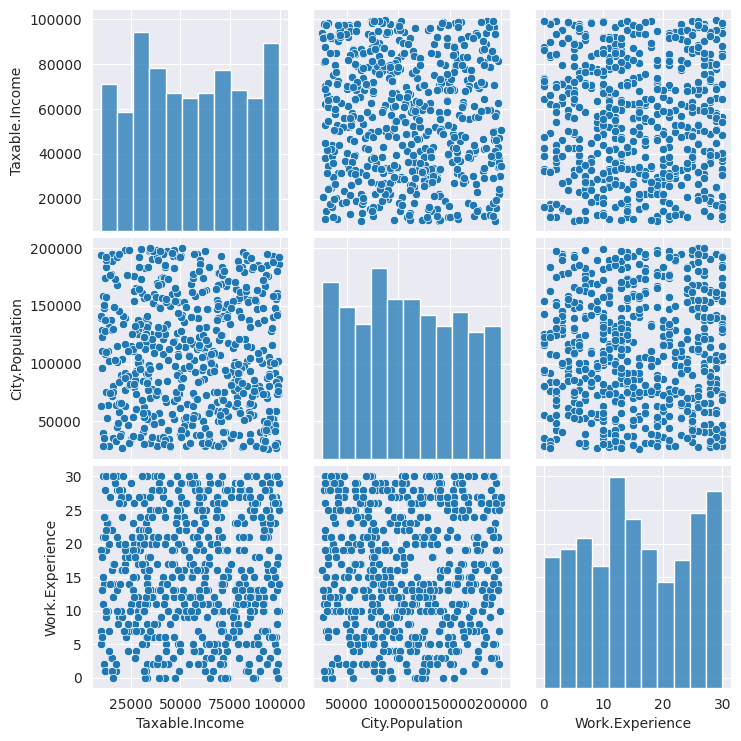

In [9]:
sns.set_style(style = 'darkgrid')
sns.pairplot(data) #none of the features is normally distributed

In [10]:
numerical_features = data.describe(include=["int64"]).columns
numerical_features

Index(['Taxable.Income', 'City.Population', 'Work.Experience'], dtype='object')

In [11]:
categorical_features = data.describe(include=["object"]).columns
categorical_features

Index(['Undergrad', 'Marital.Status', 'Urban'], dtype='object')

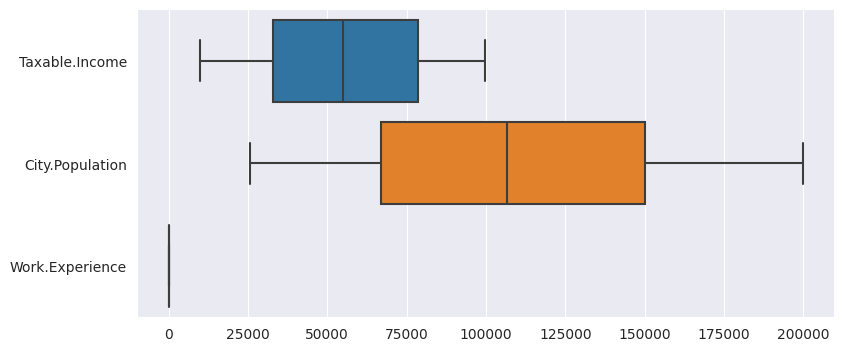

In [12]:
plt.figure(figsize=(9,4))
sns.boxplot(data= data[numerical_features], orient="h")
plt.show() #Work Experience has a mean that is much inferior to the other constituents

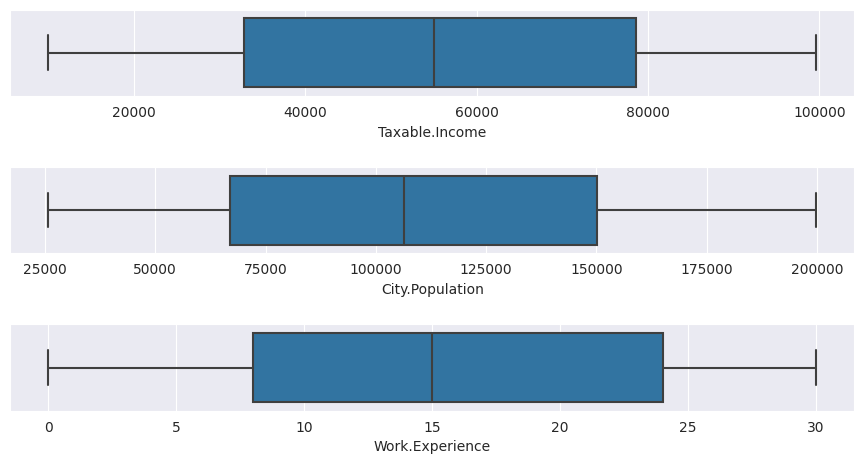

In [13]:
outlier = data.copy()
fig, axes = plt.subplots(3,1,figsize=(9,5))
sns.boxplot(x='Taxable.Income',data= outlier,ax=axes[0])
sns.boxplot(x='City.Population',data= outlier,ax=axes[1])
sns.boxplot(x='Work.Experience',data= outlier,ax=axes[2])
plt.tight_layout(pad=2.0)

Index(['Undergrad', 'Marital.Status', 'Urban'], dtype='object')


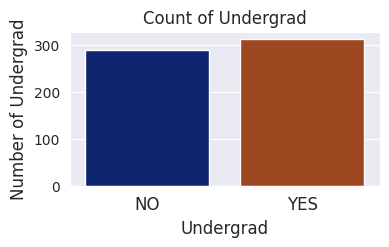

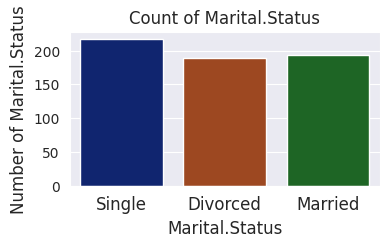

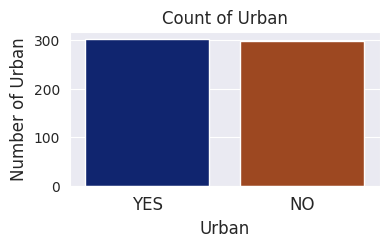

In [14]:
print(categorical_features)

for idx, column in enumerate(categorical_features):
    plt.figure(figsize=(4,2))
    unique = data[column].value_counts(ascending=True);

    plt.title("Count of "+ column)
    sns.countplot(data= data, x=column,palette = "dark")
    plt.xticks(rotation = 0, size = 12)

    plt.xlabel(column, fontsize=12)
    plt.ylabel("Number of "+ column, fontsize=12)

In [15]:
data.info() #600 rows, 6 columns and no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [ ]:
#categorical data is converted into numerical
label = preprocessing.LabelEncoder()
data['Undergrad'] = label.fit_transform(data['Undergrad'])
data['Marital.Status'] = label.fit_transform(data['Marital.Status'])
data['Urban'] = label.fit_transform(data['Urban'])

In [ ]:
data['Undergrad'].value_counts() #No=0, Yes=1

1    312
0    288
Name: Undergrad, dtype: int64

In [ ]:
data['Marital.Status'].value_counts() #Divorced=0, Married=1, Single=2

2    217
1    194
0    189
Name: Marital.Status, dtype: int64

In [ ]:
data['Urban'].value_counts() #No=0, Yes=1

1    302
0    298
Name: Urban, dtype: int64

In [ ]:
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0
...,...,...,...,...,...,...
595,1,0,76340,39492,7,1
596,1,0,69967,55369,2,1
597,0,0,47334,154058,0,1
598,1,1,98592,180083,17,0


# **Feature Engineering**

In [ ]:
#Categorial Data Based on Taxable income
tax_value=[]
for i in data['Taxable.Income']:
  if i<=30000:
    tax_value.append("risky")
  else:
    tax_value.append("Good")
data['Tax_value']=tax_value


In [ ]:
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Tax_value
0,0,2,68833,50047,10,1,Good
1,1,0,33700,134075,18,1,Good
2,0,1,36925,160205,30,1,Good
3,1,2,50190,193264,15,1,Good
4,0,1,81002,27533,28,0,Good


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    int64 
 1   Marital.Status   600 non-null    int64 
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    int64 
 6   Tax_value        600 non-null    object
dtypes: int64(6), object(1)
memory usage: 32.9+ KB


In [ ]:
data1 = data.drop(['Taxable.Income'], axis=1)

In [ ]:
data1.head()

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Tax_value
0,0,2,50047,10,1,Good
1,1,0,134075,18,1,Good
2,0,1,160205,30,1,Good
3,1,2,193264,15,1,Good
4,0,1,27533,28,0,Good


In [ ]:
#defining independent and dependent varibales
x = data1.iloc[:, 0:5] #independet variable
y = data1['Tax_value'] #dependent variable

In [ ]:
x

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0
...,...,...,...,...,...
595,1,0,39492,7,1
596,1,0,55369,2,1
597,0,0,154058,0,1
598,1,1,180083,17,0


In [ ]:
y

0      Good
1      Good
2      Good
3      Good
4      Good
       ... 
595    Good
596    Good
597    Good
598    Good
599    Good
Name: Tax_value, Length: 600, dtype: object

In [ ]:
data1['Tax_value'].unique()

array(['Good', 'risky'], dtype=object)

In [ ]:
data1.Tax_value.value_counts()

Good     476
risky    124
Name: Tax_value, dtype: int64

In [ ]:
data1.columns

Index(['Undergrad', 'Marital.Status', 'City.Population', 'Work.Experience',
       'Urban', 'Tax_value'],
      dtype='object')

In [ ]:
#splitting data into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 0) #20% data will go to test

# **Building Decision Tree Clssifier using Entropy Criteria**

# **C5.0**

In [ ]:
model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 2) #prepruning
model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [ ]:
x_test.value_counts()

Undergrad  Marital.Status  City.Population  Work.Experience  Urban
0          0               36116            20               0        1
                           42198            12               0        1
1          1               140762           26               0        1
                           131469           30               0        1
                           117250           20               1        1
                                                                     ..
0          2               34242            12               0        1
           1               166976           19               1        1
                           157217           11               1        1
                           156973           16               0        1
1          2               197916           7                0        1
Length: 120, dtype: int64

In [ ]:
x_train.value_counts()

Undergrad  Marital.Status  City.Population  Work.Experience  Urban
0          0               27300            1                1        1
                           28495            30               0        1
1          1               86648            16               1        1
                           86169            8                0        1
                           81550            17               1        1
                                                                     ..
0          2               32450            19               1        1
                           26884            13               1        1
                           25779            16               1        1
           1               197841           7                0        1
1          2               193775           27               0        1
Length: 480, dtype: int64

In [ ]:
y_train.value_counts()

Good     381
risky     99
Name: Tax_value, dtype: int64

Text(0.5, 1.0, 'Decision Tree using entropy criteria')

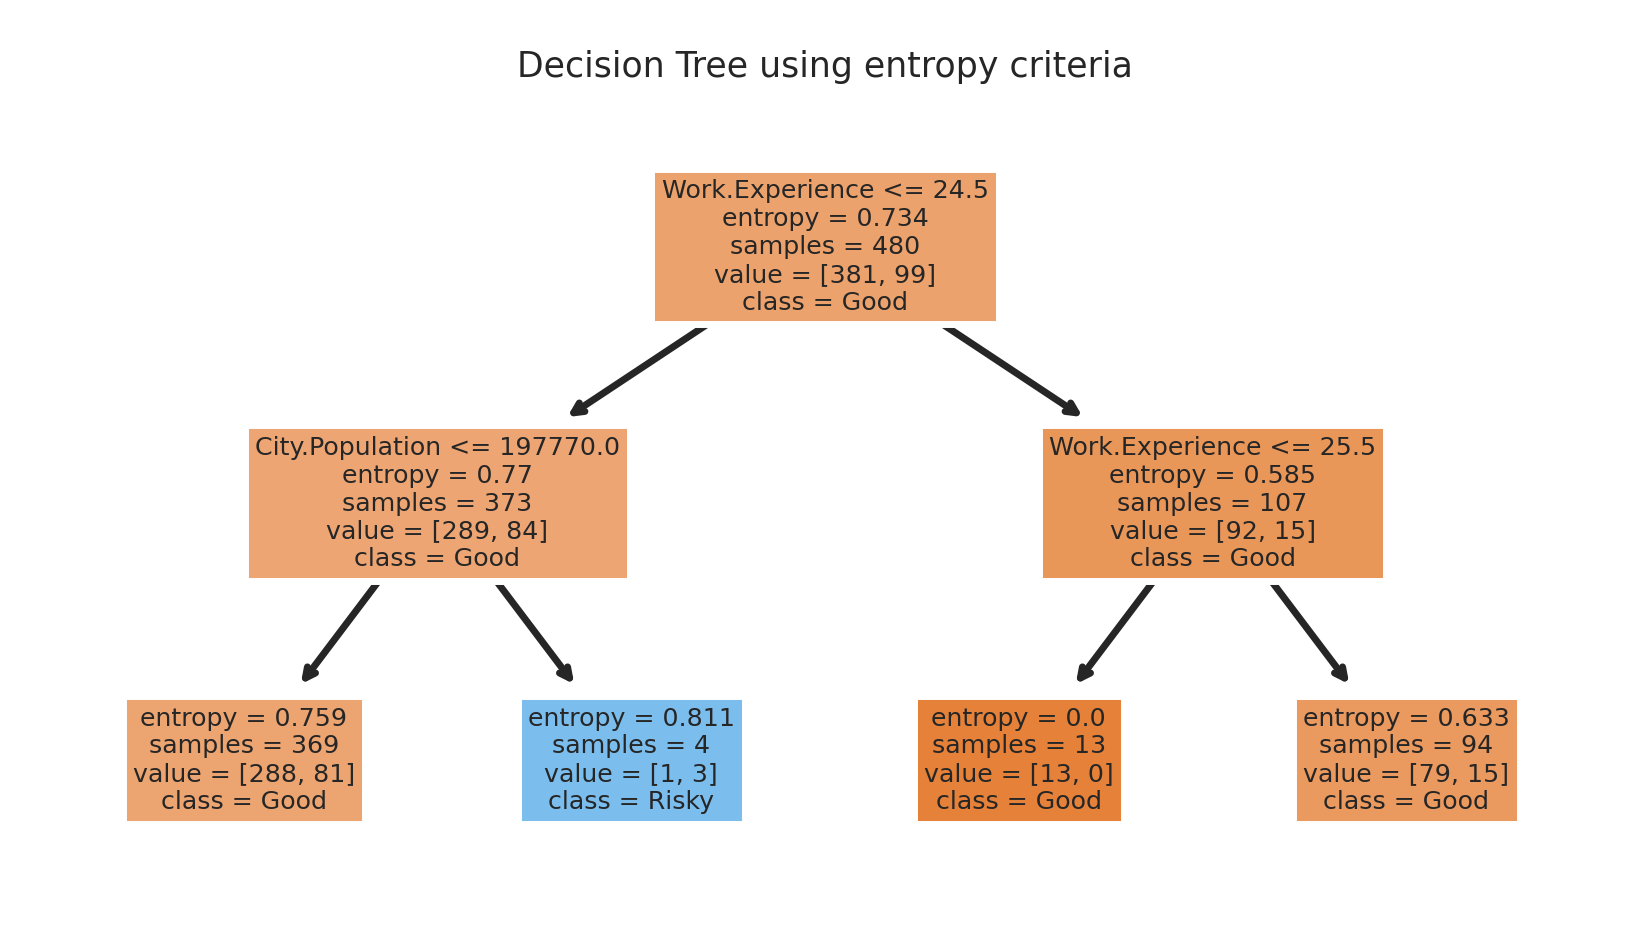

In [ ]:
#Visualizing decision tree
fn = ['Undergrad', 'Marital.Status	', 'City.Population', 'Work.Experience', 'Urban'] #columns
cn = ['Good', 'Risky'] #value_count.keys
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,2), dpi = 500) #dpi = dot per inch
tree.plot_tree(model, feature_names = fn, class_names = cn, filled = True); #leaf node will be colored
plt.title('Decision Tree using entropy criteria',fontsize=5)
#samples=x_train, value=y_train
#4 leaf nodes

# **Predicting on Test Data**

In [ ]:
pred = model.predict(x_test) #predicting on test dataset
pd.Series(pred).value_counts() #getting the count of each category

Good     119
risky      1
dtype: int64

In [ ]:
#yactual
y_test.value_counts()

Good     95
risky    25
Name: Tax_value, dtype: int64

In [ ]:
pred

array(['Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'risky', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
     

In [ ]:
pd.crosstab(y_test, pred) #getting the 2 way table to understand the correct and worng predictions
#94 are correct predictions, 26 are wrong predctions

col_0,Good,risky
Tax_value,,
Good,94,1
risky,25,0


# **Accuracy**

In [ ]:
np.mean(pred == y_test), accuracy_score(y_test, pred)

(0.7833333333333333, 0.7833333333333333)

# **78.33% Accuracy through Entropy**

# **Building Decision Tree Classifier using GINI Criteria**

# **CART**

In [ ]:
model_gini = DecisionTreeClassifier(criterion = 'gini', max_depth = 2)

In [ ]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=2)

Text(0.5, 1.0, 'Decision Tree using gini criteria')

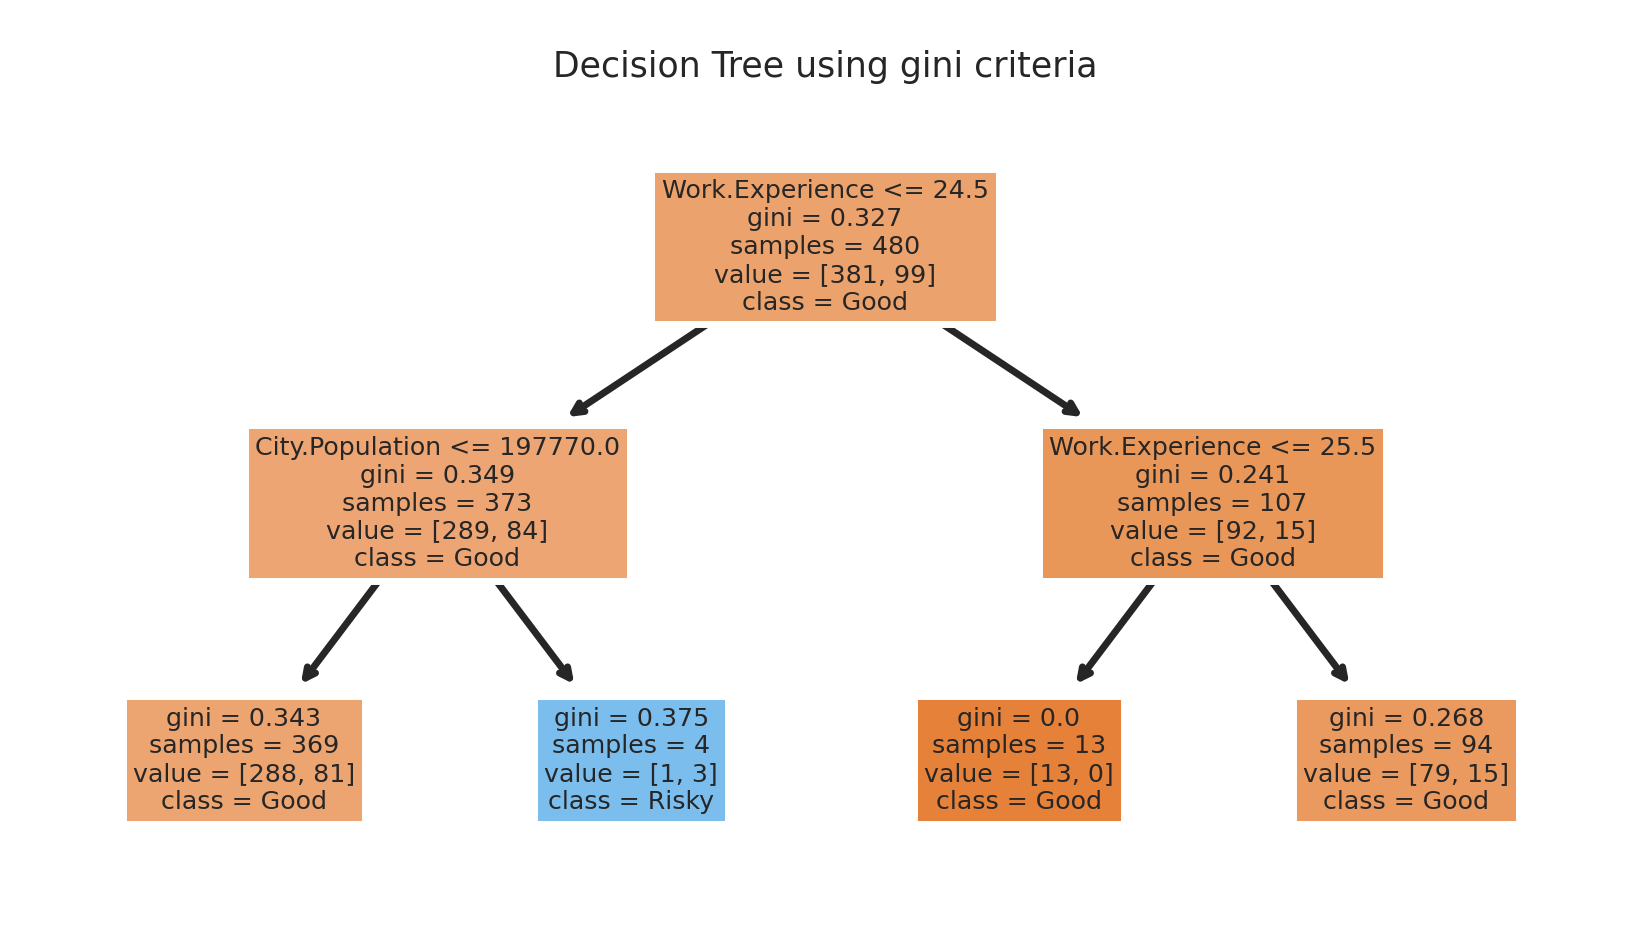

In [ ]:
#Visualizing decision tree
fn = ['Undergrad', 'Marital.Status	', 'City.Population', 'Work.Experience', 'Urban'] #columns
cn = ['Good', 'Risky'] #value_count.keys
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,2), dpi = 500) #dpi = dot per inch
tree.plot_tree(model_gini, feature_names = fn, class_names = cn, filled = True); #leaf node will be colored
plt.title('Decision Tree using gini criteria',fontsize=5)
#samples=x_train, value=y_train
#4 leaf nodes

In [ ]:
#Predicting Values on Test Data
pred_gini=model_gini.predict(x_test)
pd.Series(pred_gini).value_counts() #Getting the count of each category

Good     119
risky      1
dtype: int64

In [ ]:
pred_gini

array(['Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'risky', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
     

In [ ]:
pd.crosstab(y_test, pred_gini) #getting the 2 way table to understand the correct and worng predictions
#94 are correct predictions, 26 are wrong predctions

col_0,Good,risky
Tax_value,,
Good,94,1
risky,25,0


In [ ]:
np.mean(pred_gini == y_test), accuracy_score(y_test, pred_gini)

(0.7833333333333333, 0.7833333333333333)

# **78.33% Accuracy**